# Importing Libraries

In [25]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Reading Dataset

In [22]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [23]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<IPython.core.display.Javascript object>


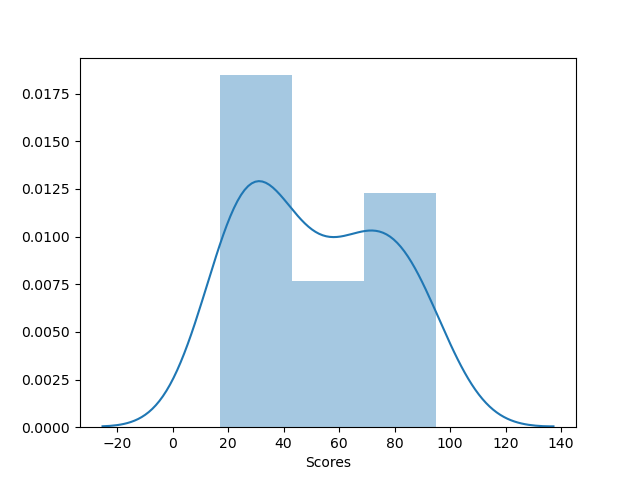

In [26]:
sns.distplot(data['Scores'])

# Plotting graph of the given dataset

<IPython.core.display.Javascript object>


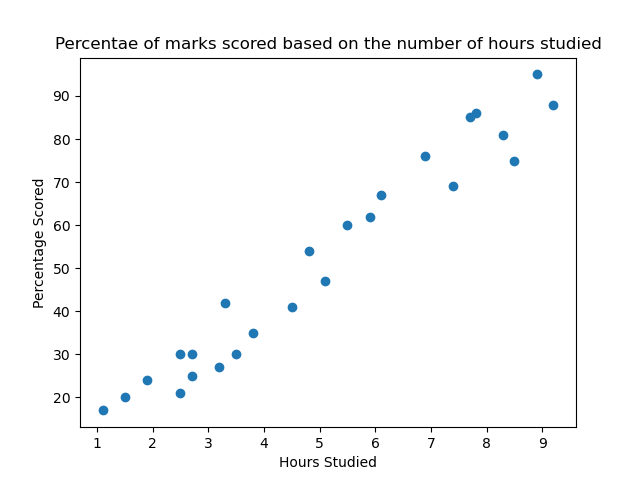

In [5]:
plt.figure()
plt.plot(data['Hours'],data['Scores'],'o')
plt.title('Percentae of marks scored based on the number of hours studied')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')  
plt.show()

<IPython.core.display.Javascript object>


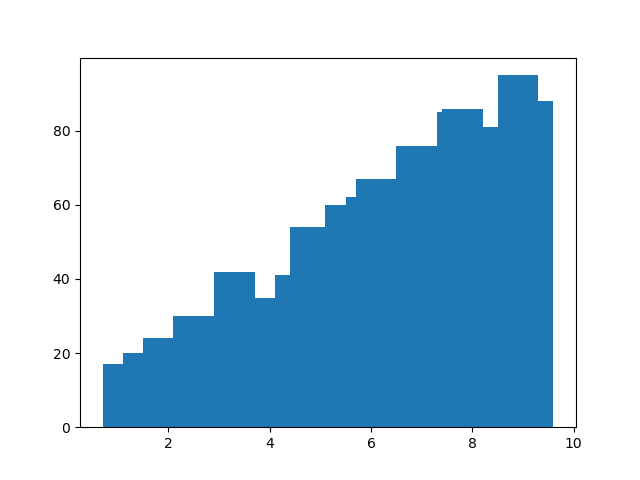

In [6]:
plt.figure()
bar=plt.bar(data['Hours'],data['Scores'],align='center',data=url)

# Training the model

In [12]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [13]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [14]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


<IPython.core.display.Javascript object>


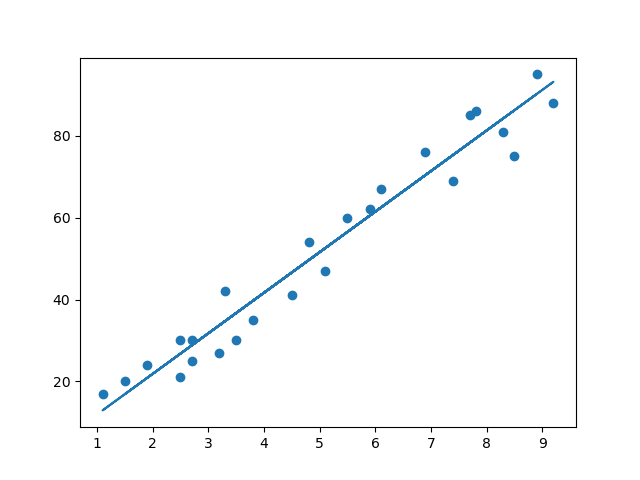

In [15]:
line = regressor.coef_*X+regressor.intercept_
plt.figure()
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [16]:
print(X_test) 
y_pred = regressor.predict(X_test) 


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [17]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [19]:
hours = 9.25
hours=np.array(data.Hours).reshape(-1,1)

own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
Predicted Score = 26.794801243040276


# Evaluating the Model

In [36]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
